# Prediction using Supervised ML

Riya Tasgaonkar

#### Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression 
from sklearn import metrics

#### Load Dataset

In [ ]:
df = pd.read_csv('http://bit.ly/w-data')

In [ ]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### Scatter Plot for dataset

Text(0.5, 1.0, 'Hours v/s scores')

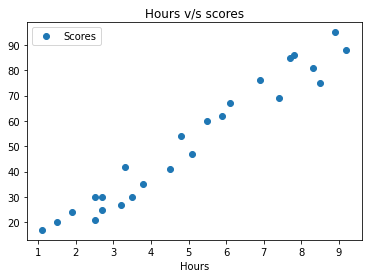

In [ ]:
df.plot( x = 'Hours',y = 'Scores', style = 'o' )
plt.title("Hours v/s scores")

#### Split dataset for training and testing

In [ ]:
X, y = df.iloc[:, :-1].values, df.iloc[:,1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 101) 

#### Linear regression

In [ ]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

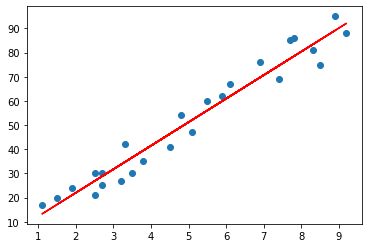

In [ ]:
line = regressor.coef_ * X + regressor.intercept_

plt.scatter(X, y)
plt.plot(X, line, color = 'red');
plt.show()

#### Making predictions

In [ ]:
y_pred = regressor.predict(X_test) 

In [ ]:
print('Predicted Values {}'.format(y_pred))

Predicted Values [26.84539693 77.45859361 39.4986961  74.53860149 56.04531809]


In [ ]:
print('Original Values {}'.format(y_test))

Original Values [30 85 35 69 60]


In [ ]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df1

,Actual,Predicted
0,30,26.845397
1,85,77.458594
2,35,39.498696
3,69,74.538601
4,60,56.045318


#### What will be predicted score if a student studies for 9.25 hrs/ day?

In [ ]:
hours = 9.25
score = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(score[0]))

No of Hours = 9.25
Predicted Score = 92.54521954029958


In [ ]:
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)
r2score = metrics.r2_score(y_test,y_pred)

print("Mean absolute error: ", MAE)
print("Mean squared error: ",MSE)
print("Root mean squared error: ", RMSE)
print("R2score: ",r2score)

Mean absolute error:  4.937597792467706
Mean squared error:  26.675642597052256
Root mean squared error:  5.164846812544614
R2score:  0.9377551740781869
